# Image Stitching

In [ ]:
# based on
# https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 200


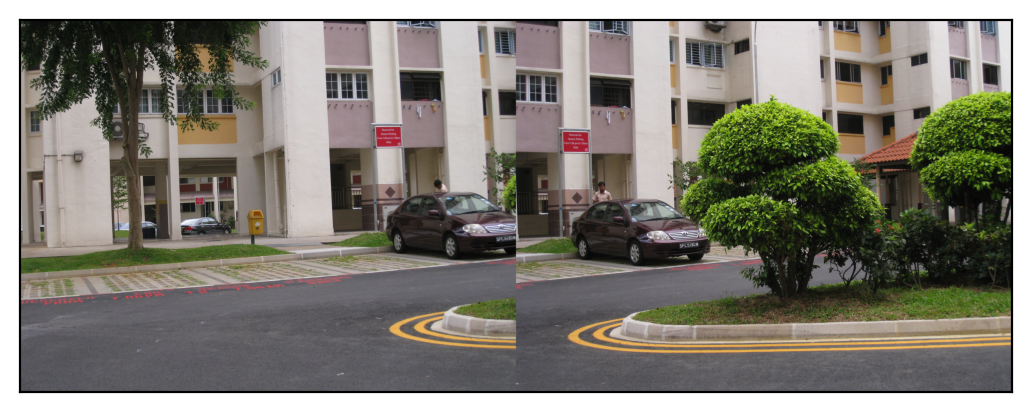

In [2]:
img_left = cv2.imread('img/STA_0031.JPG')
img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)

img_right = cv2.imread('img/STB_0032.JPG')
img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)

imgab = np.hstack((img_left, img_right))
plt.imshow(imgab)
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.show()

## SIFT keypoints and descriptors

In [3]:
img_left_gray = cv2.cvtColor(img_left,cv2.COLOR_RGB2GRAY)
img_right_gray = cv2.cvtColor(img_right,cv2.COLOR_RGB2GRAY)

In [4]:
# SIFT keypoints and desciptors for the two images.
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img_right_gray,None)
kp2, des2 = sift.detectAndCompute(img_left_gray,None)

## Matching descriptors of 2 images

In [5]:
bf = cv2.BFMatcher()

In [6]:
matches = bf.knnMatch(des1,des2, k=2)

In [7]:
good = []
for m in matches:
    if (m[0].distance < 0.5*m[1].distance):
        good.append(m)
matches = np.asarray(good)

## Homography transformation

In [8]:
if (len(matches[:,0]) >= 4):
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertionError('Can’t find enough keypoints.')

## Stitch the images

In [9]:
# (img, Homography matrix, Output size)
dst = cv2.warpPerspective(img_right,H,((img_right.shape[1] + img_left.shape[1]), img_left.shape[0])) #wraped image
dst[0:img_left.shape[0], 0:img_left.shape[1]] = img_left #stitched image

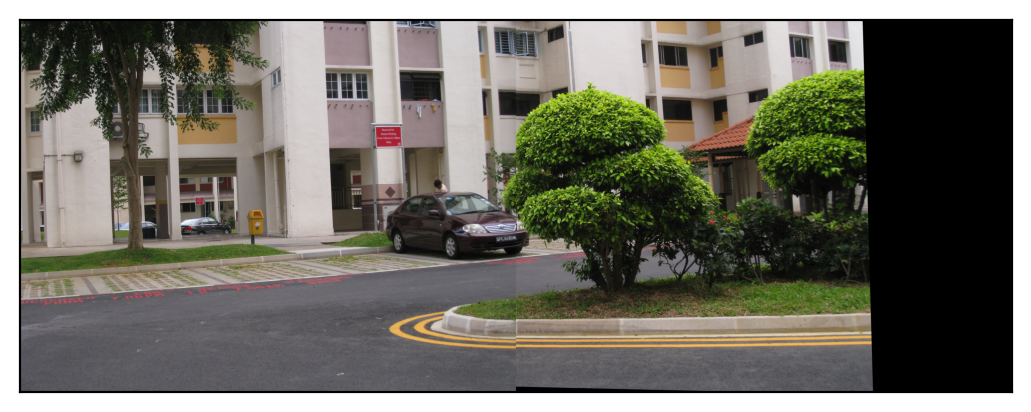

In [10]:
plt.imshow(dst)
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
plt.show()